# UAS Deep Learning
Nama: Neddy Avgha Prasetio \
NIM: I.2211134

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [29]:
# import cifar100 dataset
(X_train, X_label), (y_test, y_label) = cifar100.load_data(label_mode='fine')

In [44]:
print("Data training\t: ",X_train.shape)
print("Label training\t: ", X_label.shape)
print("=====================================")
print("Data testing\t: ",y_test.shape)
print("Label testing\t: ",y_label.shape)

Data training	:  (50000, 32, 32, 3)
Label training	:  (50000, 1)
Data testing	:  (10000, 32, 32, 3)
Label testing	:  (10000, 1)


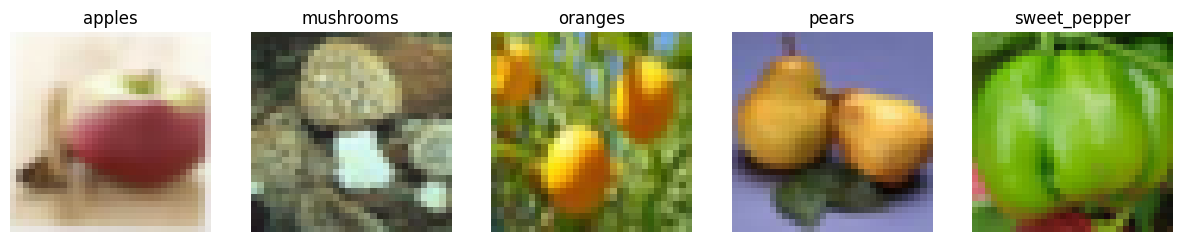

In [31]:
indeks_fruit_and_vegetables = {
    "apples": 0,
    "mushrooms": 51,
    "oranges": 53,
    "pears": 57,
    "sweet_pepper": 83,
}

plt.figure(figsize=(15, 3))
for i, (nama_kelas, nama_indeks) in enumerate(indeks_fruit_and_vegetables.items()):
    indeks = np.where(X_label.flatten() == nama_indeks)[0][0]
    plt.subplot(1, len(indeks_fruit_and_vegetables), i + 1)
    plt.imshow(X_train[indeks])
    plt.title(nama_kelas)
    plt.axis('off')
    
plt.show()

In [32]:
X_train_baru = []
X_label_baru = []
y_test_baru = []
y_label_baru = []
for i in indeks_fruit_and_vegetables.values():
    indeks = np.where(X_label == i)[0]
    X_train_baru.append(X_train[indeks])
    X_label_baru.append(X_label[indeks])

    indeks = np.where(y_label == i)[0]
    y_test_baru.append(y_test[indeks])
    y_label_baru.append(y_label[indeks])
    
X_train_baru = np.concatenate(X_train_baru)
X_label_baru = np.concatenate(X_label_baru)
y_test_baru = np.concatenate(y_test_baru)
y_label_baru = np.concatenate(y_label_baru)

In [33]:
X_train_baru = X_train_baru / 255.0
y_test_baru = y_test_baru / 255.0

# karena menggunakan sparse_categorical_crossentropy, maka label tidak perlu di konversi ke categorical
# X_label_baru = to_categorical(X_label_baru, 100)
# y_label_baru = to_categorical(y_label_baru, 100)

In [34]:
model_cnn = Sequential([
    Conv2D(32, (3,3), padding="same", activation='relu', input_shape=X_train_baru.shape[1:]),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(100, activation='softmax')
])

In [35]:
model_rcnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')
])


- Model CNN
1. Conv2D adalah proses dimana data gambar diolah dengan jumlah filter sebesar 32, setiap filter 3x3 piksel
2. MaxPooling2D adalah proses dimana nilai maksimum diambil dari setiap jendela 2x2 piksel
3. Flatten digunakan untuk mengubah array 2D menjadi 1D
4. Dense digunakan untuk menghubungkan setiap neuron antar layer

- Model RCNN
1. Conv2D adalah proses dimana data gambar diolah dengan jumlah filter sebesar 32, setiap filter 3x3 piksel
2. BatchNormalization adalah proses dimana data gambar diubah menjadi distribusi normal dengan rata-rata (mean) = 0 dan ukuran seberapa jauh titik data dari mean (standard deviation) = 1
3. MaxPooling2D adalah proses dimana nilai maksimum diambil dari setiap jendela 2x2 piksel
4. Dropout adalah proses dimana beberapa unit dihilangkan secara acak dari jaringan selama pelatihan. Digunakan untuk menghindari overfitting
5. Flatten digunakan untuk mengubah array 2D menjadi 1D
6. Dense digunakan untuk menghubungkan setiap neuron antar layer

In [36]:
model_cnn.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

model_cnn.fit(
    X_train_baru, X_label_baru,
    batch_size=256,
    epochs=10,
    validation_data=(y_test_baru, y_label_baru))

Epoch 1/10
10/10 [==============================] - 3s 188ms/step - loss: 5.4744 - accuracy: 0.2108 - val_loss: 1.9930 - val_accuracy: 0.3440
Epoch 2/10
10/10 [==============================] - 2s 171ms/step - loss: 1.7422 - accuracy: 0.3320 - val_loss: 1.9745 - val_accuracy: 0.3460
Epoch 3/10
10/10 [==============================] - 2s 174ms/step - loss: 1.5838 - accuracy: 0.3072 - val_loss: 1.3766 - val_accuracy: 0.4260
Epoch 4/10
10/10 [==============================] - 2s 168ms/step - loss: 1.3625 - accuracy: 0.4292 - val_loss: 1.2705 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 2s 174ms/step - loss: 1.2795 - accuracy: 0.4664 - val_loss: 1.2171 - val_accuracy: 0.5040
Epoch 6/10
10/10 [==============================] - 2s 175ms/step - loss: 1.2422 - accuracy: 0.4892 - val_loss: 1.2050 - val_accuracy: 0.4920
Epoch 7/10
10/10 [==============================] - 2s 167ms/step - loss: 1.2409 - accuracy: 0.4812 - val_loss: 1.1967 - val_accuracy: 0.4880
Epoch 

In [37]:
model_rcnn.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

model_rcnn.fit(
    X_train_baru, X_label_baru,
    batch_size=256,
    epochs=10,
    validation_data=(y_test_baru, y_label_baru))

Epoch 1/10
10/10 [==============================] - 5s 258ms/step - loss: 3.9305 - accuracy: 0.4088 - val_loss: 51.1966 - val_accuracy: 0.0020
Epoch 2/10
10/10 [==============================] - 2s 225ms/step - loss: 1.8051 - accuracy: 0.5780 - val_loss: 49.2412 - val_accuracy: 0.1800
Epoch 3/10
10/10 [==============================] - 2s 222ms/step - loss: 1.3228 - accuracy: 0.6088 - val_loss: 11.9190 - val_accuracy: 0.2360
Epoch 4/10
10/10 [==============================] - 2s 222ms/step - loss: 1.0903 - accuracy: 0.6336 - val_loss: 9.7614 - val_accuracy: 0.2980
Epoch 5/10
10/10 [==============================] - 2s 217ms/step - loss: 0.9722 - accuracy: 0.6588 - val_loss: 3.7139 - val_accuracy: 0.3780
Epoch 6/10
10/10 [==============================] - 2s 227ms/step - loss: 0.9109 - accuracy: 0.6656 - val_loss: 2.4026 - val_accuracy: 0.4520
Epoch 7/10
10/10 [==============================] - 2s 230ms/step - loss: 0.8440 - accuracy: 0.6860 - val_loss: 1.4701 - val_accuracy: 0.4660
Epo

In [38]:
model_cnn.save('model_cnn.h5')
model_rcnn.save('model_rcnn.h5')

load_model_cnn = tf.keras.models.load_model('model_cnn.h5')
load_model_rcnn = tf.keras.models.load_model('model_rcnn.h5')

c:\Users\neddy\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


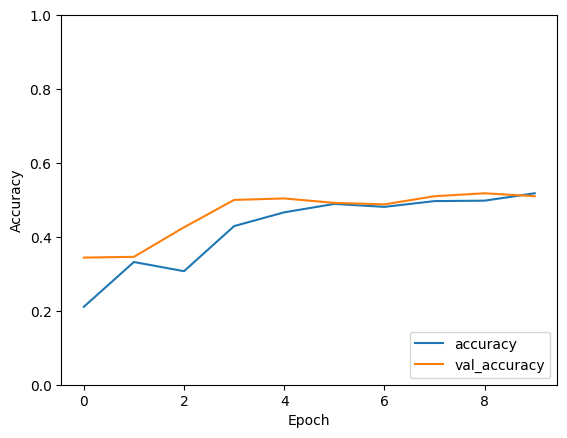

In [39]:
plt.plot(model_cnn.history.history['accuracy'], label='accuracy')
plt.plot(model_cnn.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

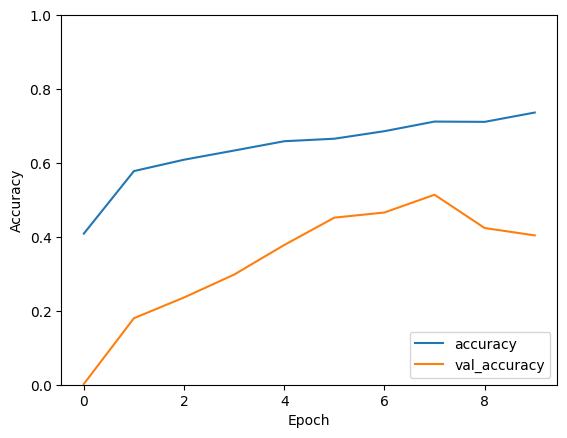

In [41]:
plt.plot(model_rcnn.history.history['accuracy'], label='accuracy')
plt.plot(model_rcnn.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

## Kesimpulan:
### Model CNN

accuracy: 0.5180 \
val_accuracy: 0.5100 \
menunjukkan bahwa model CNN memiliki akurasi yang rendah, hal ini mungkin disebabkan karena model CNN tidak memiliki layer yang cukup untuk memproses data dan proses pelatihan yang mungkin kurang optimal dengan 10 epoch. Tetapi tidak terjadi kejomplangan (overfitting) karena val_accuracy dan accuracy memiliki nilai yang hampir sama.

### Model RCNN

accuracy: 0.7364 \
val_accuracy: 0.4040 \
menunjukkan bahwa model RCNN memiliki akurasi yang lebih tinggi dibandingkan model CNN, hal ini mungkin disebabkan karena model RCNN memiliki layer yang lebih banyak untuk memproses data dengan hanya 10 epoch. Tetapi model RCNN memiliki val_accuracy yang lebih rendah dibandingkan model CNN, hal ini mungkin disebabkan karena kurangnya proses pelatihan (epoch), overfitting, atau karena model RCNN memiliki dropout yang menyebabkan beberapa unit dihilangkan secara acak dari jaringan selama pelatihan. yang menyebabkan model RCNN tidak dapat memproses data dengan baik.
